In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import urllib
dataset_path = os.path.join("dataset")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz" 
def fetch_data(download_url= download_url, dataset_path= dataset_path):
    os.makedirs(dataset_path, exist_ok= True)
    tgz_path = os.path.join(dataset_path, "housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path= dataset_path)
    housing_tgz.close()
fetch_data()
def load_data(dataset_path= dataset_path):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)
housing_data = load_data()
df=housing_data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
print(df.isnull().sum())
df.isnull().sum().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


207

**Filling the missing values with average values**

In [4]:
a=df.pop('ocean_proximity')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df)
df=imputer.transform(df)
df=pd.DataFrame(df,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
df.isnull().sum().sum()

0

In [6]:
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms'] / df['total_rooms']
df['population_per_household']=df['population']/df['households']
df['household_per_population']=df['households']/df['population']
df['population_per_room']=df['population']/df['total_rooms']
df['population_per_bedroom']=df['population']/df['total_bedrooms']
df['income_per_house_val']=df['median_house_value']/df['median_income']
df['income_per_room']=df['rooms_per_household']/df['median_income']
df['house_val_per_room']=df['median_house_value']/df['rooms_per_household']
df=df.drop(columns=['longitude'])
df=df.drop(columns=['latitude'])
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,household_per_population,population_per_room,population_per_bedroom,income_per_house_val,income_per_room,house_val_per_room
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.391304,0.365909,2.496124,54365.060299,0.838914,64804.090909
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.473969,0.338217,2.170886,43185.486785,0.751456,57469.080152
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.356855,0.338105,2.610526,48515.997465,1.142025,42482.413088
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.392473,0.437991,2.374468,60480.941327,1.030879,58669.309262
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.458407,0.347265,2.017857,88970.932349,1.633262,54474.370006


In [7]:
b=df.pop('median_house_value')
df['ocean_proximity']=a
df['median_house_value']=b
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,household_per_population,population_per_room,population_per_bedroom,income_per_house_val,income_per_room,house_val_per_room,ocean_proximity,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0.391304,0.365909,2.496124,54365.060299,0.838914,64804.090909,NEAR BAY,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0.473969,0.338217,2.170886,43185.486785,0.751456,57469.080152,NEAR BAY,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0.356855,0.338105,2.610526,48515.997465,1.142025,42482.413088,NEAR BAY,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0.392473,0.437991,2.374468,60480.941327,1.030879,58669.309262,NEAR BAY,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0.458407,0.347265,2.017857,88970.932349,1.633262,54474.370006,NEAR BAY,342200.0


In [8]:
plt.figure(figsize=(15,15))
lat=df['latitude']
long=df['longitude']
pop=df['population']
plt.scatter(lat,long, c=pop, cmap='PuBuGn_r',s=200,alpha=1)
plt.colorbar().set_label("Population")
plt.title('Population Density')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

KeyError: 'latitude'

<Figure size 1080x1080 with 0 Axes>

**INFERENCE :**  Areas under **latitude 119 to 122 and longitude 34 to 36** are scarcely populated.
                  Rest areas have a population **< 5000**

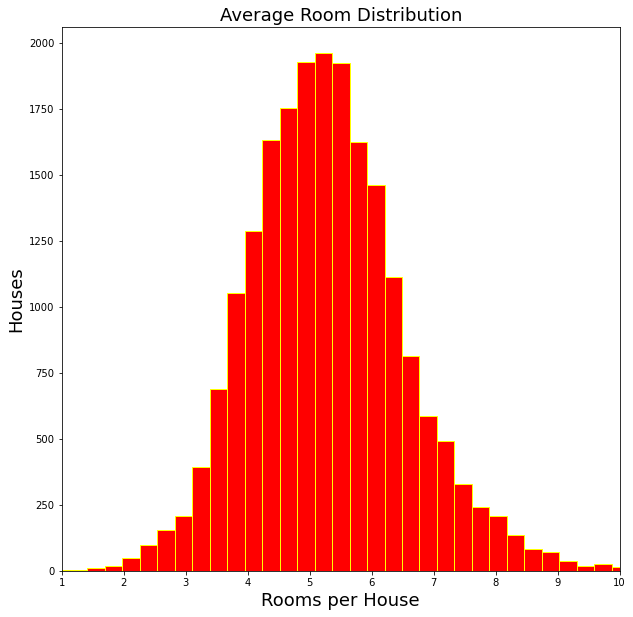

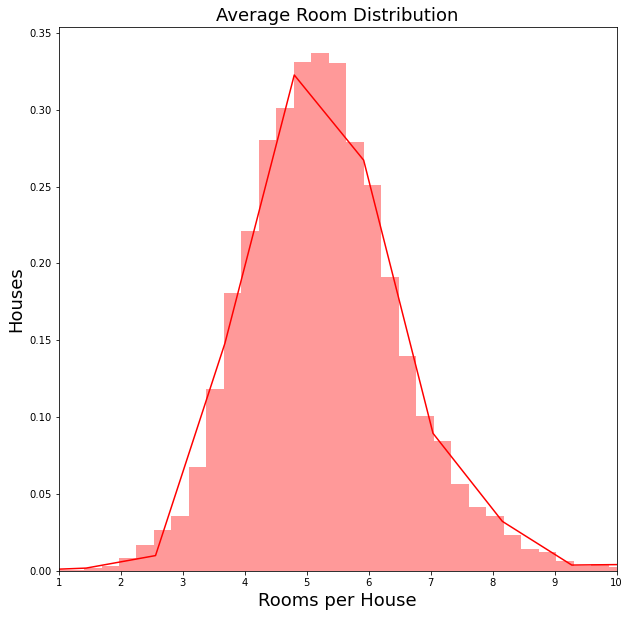

In [20]:
plt.figure(figsize=(10, 10))
plt.hist(df['rooms_per_household'],bins=500, ec = 'yellow' ,color = 'red')
plt.xlabel('Rooms per House', fontsize=18)
plt.ylabel('Houses', fontsize=18)
plt.title('Average Room Distribution', fontsize=18)
plt.xlim(1, 10)
plt.show()

plt.figure(figsize=(10, 10))
sns.distplot(df['rooms_per_household'], bins=500,color = 'red')
plt.xlabel('Rooms per House', fontsize=18)
plt.ylabel('Houses', fontsize=18)
plt.title('Average Room Distribution', fontsize=18)
plt.xlim(1, 10)
plt.show()

**INFERENCE :** Most of the houses have 4 to 6 rooms with 5 being most common

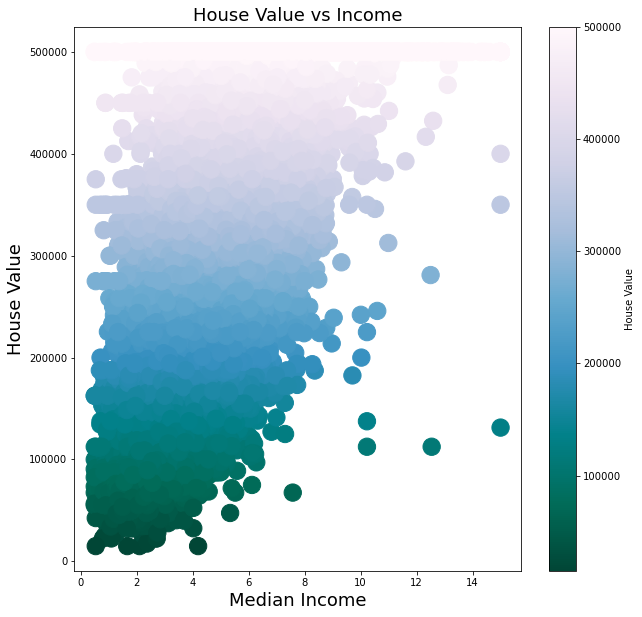

In [21]:
location = df['ocean_proximity'].value_counts()
plt.figure(figsize=(10,10))
x1=df['median_income']
y1=df['median_house_value']
plt.scatter(x1,y1,c=y1, cmap='PuBuGn_r',alpha=1,s=300)
plt.colorbar().set_label('House Value')
plt.title('House Value vs Income',fontsize=18)
plt.xlabel('Median Income',fontsize=18)
plt.ylabel('House Value',fontsize=18)
plt.show()

**INFERENCE :** Most People with median income of 0 to 4 can afford hosue with value upto 100000 

Text(0.5, 1.0, 'Correlation Matrix')

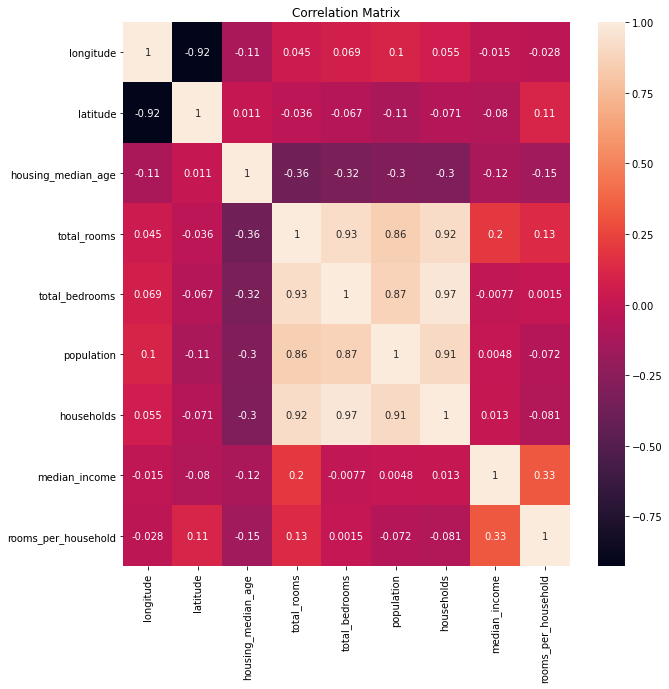

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,:9].corr(),annot=True)
plt.title("Correlation Matrix")

**INFERENCE :** Total rooms, total bedrooms, population and households are highly correlated

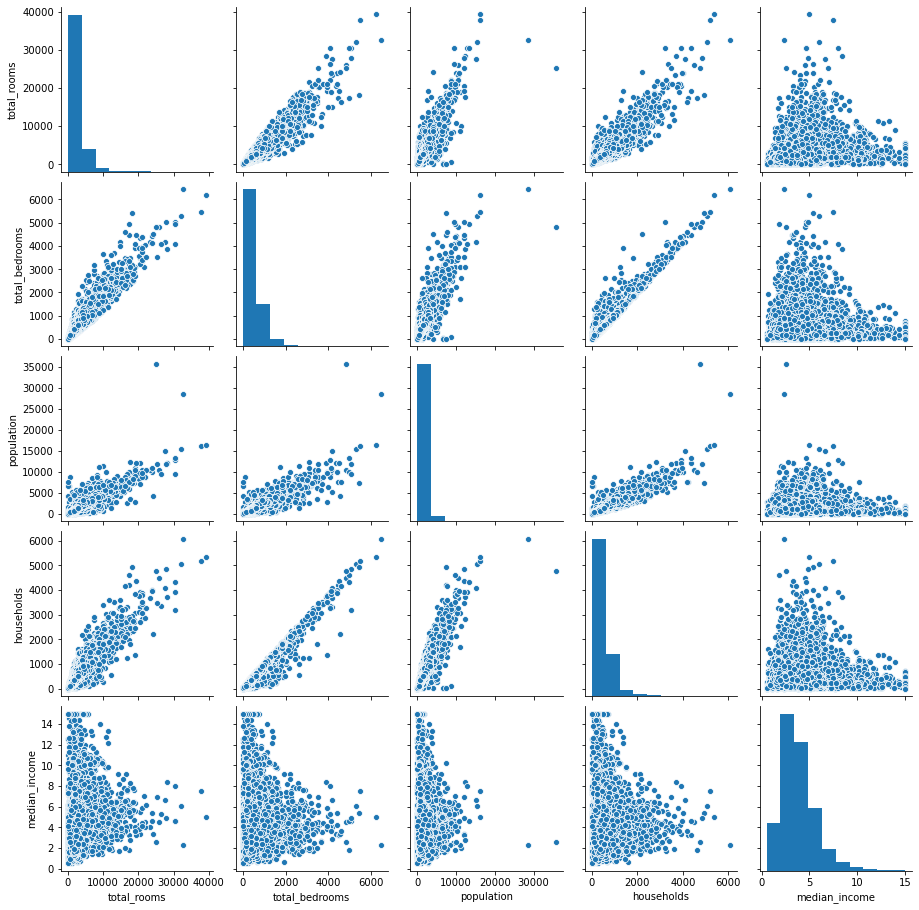

In [23]:
sns.pairplot(housing_data.iloc[:,3:8])

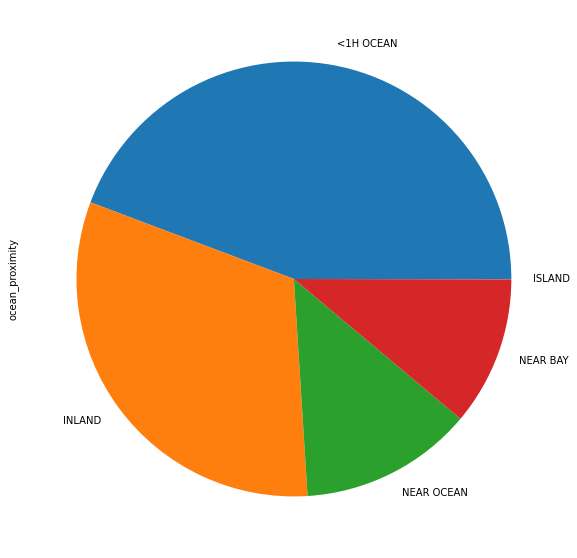

In [24]:
plt.figure(figsize=(10,10))
df['ocean_proximity'].value_counts().plot.pie()
plt.show()

**INFERENCE :** Areas which are <1H Ocean are highly populated and Island has the least population 

# DECISION TREE

**Splitting the dataset into x and y where x has contains dependent variable and y contains independent variable** 

In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

**Encoding the categorical data which here is ocean proximity**

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
c=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[15])],remainder='passthrough')
x=np.array(c.fit_transform(x))

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y)

array([3665, 3074, 3017, ...,  508,  432,  479], dtype=int64)

**Splitting the dataset into training and test set where training set is 80% and test set is 20%**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [13]:
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

**SCALING THE DATA USING STANDARD SCALING METHOD**

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.fit_transform(y_test)

In [15]:
print(x_train[0])

[-8.94683165e-01 -6.77337517e-01 -1.74040742e-02  2.82640555e+00
 -3.85462019e-01  1.85890297e+00 -5.64976839e-01 -6.04199906e-01
 -4.86113803e-01 -5.71593847e-01 -3.62326052e-01 -1.68773340e-01
 -1.69938846e-01  1.90138738e-03 -4.73527950e-01 -5.16724621e-04
  1.11780510e-02  7.09029385e-01 -6.16994910e-02  4.82475303e-01]


**Using Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [17]:
y_pred=regressor.predict(x_test)


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9434804492798502

**The model has an accuracy of 94.06%**

In [19]:
import statsmodels.api as sm
X_addC = sm.add_constant(x_test)
result = sm.OLS(y_pred, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.9033387734467695 0.9029153365818491


In [20]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

regr = OLS(y_pred, add_constant(x_test)).fit()
print(regr.aic)

2447.436420901754


In [21]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.14460510779423286


In [22]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

0.056519550720149817
0.237738408171986
